### Códigos fortemente baseados no Capítulo 2 do livro de Luciano Ramalho: **Ramalho, L. (2015). *Python fluente: Programação clara, concisa e eficaz*. Novatec.**

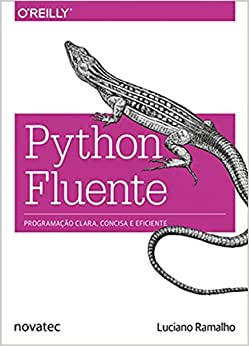

In [1]:
from IPython.display import Image
path = 'C:/Users/User/Desktop/Python para Psicólogos/python-geral/024 - Uma coleção de sequências/'
Image(filename = f'{path}Ramalho (2015).jpg') 

### **Visão geral das sequências embutidas**

Sequências container: list, tuple e collections.deque; podem 

*   *Sequências container*: list, tuple e collections.deque; podem armazenar tipos diferentes;
*   *Simples*: str, bytes, bytearray, memoryview, array.array; armazenam itens de um só tipo;
*   *Mutáveis*: list, bytearray, array.array, collections.deque, memoryview;
*   *Imutáveis*: tuple, str, bytes;

### **List comprehensions e expressões geradoras**

In [5]:
# preenchendo uma lista com for loop
symbols = '$¢£☺☻♥'
codes = []
symbol = "teste1"
for symbol in symbols: # symbol é uma variável global
    codes.append(ord(symbol))

print(codes)
print(symbol)

# mesmo código acima, mas usando listcomps
symbols = '$¢£☺☻♥'
symbol = "teste2" 
new_codes = [ord(symbol) for symbol in symbols] # symbol agora é uma variável local

print(new_codes)
print(symbol)

[36, 162, 163, 9786, 9787, 9829]
♥
[36, 162, 163, 9786, 9787, 9829]
teste2


In [6]:
# listcomps e produtos cartesianos
drugs = ['placebo', 'medication']
times = ['pre-treatment', 'posttreatment', 'follow-up']
conditions = [(drug, time) for drug in drugs for time in times]
conditions

[('placebo', 'pre-treatment'),
 ('placebo', 'posttreatment'),
 ('placebo', 'follow-up'),
 ('medication', 'pre-treatment'),
 ('medication', 'posttreatment'),
 ('medication', 'follow-up')]

In [9]:
# genexps
symbols = '$¢£☺☻♥'
codes = tuple(ord(symbol) for symbol in symbols)
print(codes)

import array
array.array('I', (ord(symbol) for symbol in symbols))

(36, 162, 163, 9786, 9787, 9829)


array('I', [36, 162, 163, 9786, 9787, 9829])

### **Tuplas**

In [4]:
# Tuplas como listas imutáveis
minha_tupla = (1, 2, 3, 4, 5)

# Tuplas como registros (dados de um campo, com posição indicando significado de cada registro)
coordenadas = (33.9425, -118.408056)
latitude, longitude = coordenadas # atribuição paralela

# desempacotando uma tupla
local_copa, ano, campea, vice, terceira = ('Rússia', 2018, 'França', 'Croácia', 'Bélgica')

# criando uma lista de tuplas com valores ordenados dentro de cada tupla, representando registros
copas = [(1994, 'EUA', 'Brasil'), (1998, 'França', 'França'), (2002, 'Japão e Coreia do Sul', 'Brasil'),
         (2006, 'Alemanha', 'Itália'), (2010, 'África do Sul', 'Espanha'), (2014, 'Brasil', 'Alemanha'),
         (2018, 'Rússia', 'França')]

# iterando sobre os elementos da tupla
for ano, sede, campeã in copas:
    print(f'A copa de {ano}, {sede}, foi vencida por {campeã}.')



A copa de 1994, EUA, foi vencida por Brasil.
A copa de 1998, França, foi vencida por França.
A copa de 2002, Japão e Coreia do Sul, foi vencida por Brasil.
A copa de 2006, Alemanha, foi vencida por Itália.
A copa de 2010, África do Sul, foi vencida por Espanha.
A copa de 2014, Brasil, foi vencida por Alemanha.
A copa de 2018, Rússia, foi vencida por França.


In [5]:
# desempacotamento de tuplas com biblioteca os
import os
path, filename = os.path.split('C:/Users/User/Desktop/português.txt')
print(path)
print(filename)

C:/Users/User/Desktop
português.txt


In [8]:
# capturando itens excedentes com o token asterisco (*args)
a, b, *rest = range(10)
print(a)
print(b)
print(rest)

print()

# e se o número de itens for menor que a tupla a ser desempacotada?
c, d, *rest = range(2)
print(c)
print(d)
print(rest)

print()

# mudando a posição do token asterisco
e, *rest, f = range(10)
print(e)
print(rest)
print(f)


0
1
[2, 3, 4, 5, 6, 7, 8, 9]

0
1
[]

0
[1, 2, 3, 4, 5, 6, 7, 8]
9


In [10]:
# tuplas nomeadas
from collections import namedtuple

Cidade = namedtuple('Cidade', 'nome país população coordenadas')
toquio = Cidade('Tóquio', 'JP', 36.933, (35.689722, 139.691667))
print(toquio.população)
print(toquio.coordenadas)

36.933
(35.689722, 139.691667)


In [11]:
# atributos e métodos de uma tupla nomeada
Cidade._fields

('nome', 'país', 'população', 'coordenadas')

In [48]:
# fatiamento
string = 'python'
print(string[::-1], end = '\n\n') # cria um objeto do tipo slice(a, b, c) --> seq.__getitem__(slice(start, stop, step))

# nomeando fatias
copas = '''
1994 EUA     BRA ITA 
1998 FRA     FRA BRA
2002 JAP/COR BRA ALE
2006 ALE     ITA FRA
2010 AFR     ESP HOL
2014 BRA     ALE ARG
2018 RUS     FRA CRO
'''

ANO = slice(0, 4)
SEDE = slice(6, 12)
CAMPEA = slice(13, 16)
VICE = slice(17, 20)

copas_linhas = copas.split('\n')[2:]

print(f"ANO  SEDE 1ª")
for copa in copas_linhas:
    print(copa[ANO], copa[CAMPEA], copa[VICE])



nohtyp

ANO  SEDE 1ª
1998 FRA BRA
2002 BRA ALE
2006 ITA FRA
2010 ESP HOL
2014 ALE ARG
2018 FRA CRO
  


In [21]:
# atribuindo valores a fatias
lista = list(range(10))
lista[2:5] = [100] # valor à direita deve ser um iterável para ser passado como valor a uma fatia!
print(lista)

[0, 1, 100, 5, 6, 7, 8, 9]


In [24]:
# listas de listas, jeito correto de criar
tabuleiro = [['_'] * 3 for i in range(3)] # listcomp
print(tabuleiro) 

tabuleiro[1][2] = 'X'
print(tabuleiro)

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]
[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]


In [27]:
# listas de listas, jeito incorreto de fazer
tabuleiro_estranho = [['_'] * 3] * 3 # cria cópias que apontam para um mesmo objeto
print(tabuleiro_estranho) # até aqui tudo bem

tabuleiro_estranho[1][2] = 'X'
print(tabuleiro_estranho) # oops!

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]
[['_', '_', 'X'], ['_', '_', 'X'], ['_', '_', 'X']]


In [29]:
# atribuições combinadas e sequências 
a = 5
b = 1
a += b # operador += invoca __iadd__; caso o método não exista, ele invoca __add__
print(a)

# *= com sequência mutável
lista = [1, 2, 3]
print(id(lista))
lista *= 2
print(lista)
print(id(lista))

6
140207090660368
[1, 2, 3, 1, 2, 3]
140207090660368


In [30]:
# *= com sequência imutável
tupla = (1, 2, 3)
print(id(tupla))
tupla *= 2
print(tupla)
print(id(tupla))

140207091874624
(1, 2, 3, 1, 2, 3)
140207092516800


In [36]:
# list.sort() e sorted(list)

# list.sort() = modifica a lista in-place e devolve None
a = ['uva', 'laranja', 'maçã', 'banana', 'pêssego', 'limão']
a.sort()

# sorted(list) = cria nova lista e a retorna, mas não modifica lista original
b = ['uva', 'laranja', 'maçã', 'banana', 'pêssego', 'limão']
c = sorted(b)

print(f"a: {a}")
print(f"b: {b}")
print(f"c: {c}")

a: ['banana', 'laranja', 'limão', 'maçã', 'pêssego', 'uva']
b: ['uva', 'laranja', 'maçã', 'banana', 'pêssego', 'limão']
c: ['banana', 'laranja', 'limão', 'maçã', 'pêssego', 'uva']


In [40]:
# administrando sequências ordenadas com bisect
import bisect

def mencao(nota, faixas = [1, 3, 5, 7, 9], mencoes = ['SR', 'II', 'MI', 'MM', 'MS', 'SS']):
    '''Calcula menções conforme o sistema da UnB, dadas as notas dos alunos.'''
    i = bisect.bisect(faixas, nota)
    return mencoes[i]

[mencao(nota) for nota in [0.2, 1.2, 3, 3.5, 5.6, 6.9, 7.1, 7.6, 8.0, 8.9, 9.1, 10]]

['SR', 'II', 'MI', 'MI', 'MM', 'MM', 'MS', 'MS', 'MS', 'MS', 'SS', 'SS']

In [41]:
# collections.deque = fila dupla thread-safe
from collections import deque

dq = deque(range(10), maxlen = 10) 
dq

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
# rotaciona fila: itens da direita vão para a esquerda quando valor é positivo
dq.rotate(3)
print(dq, end = '\n\n')

# rotaciona para o lado oposto
dq.rotate(-4)
print(dq, end = '\n\n')

# appendleft = acrescenta valor do lado esquerdo; se len == maxlen, então valor da direita é excluído
dq.appendleft(-10)
print(dq, end = '\n\n')

# extend = uma espécie de appendright; se len == maxlen, então valores da esquerda são excluídos
dq.extend(['a', 'b', 'c', 'd'])
print(dq, end = '\n\n')


deque([8, 9, 0, -10, 2, 3, 4, 5, 6, 7], maxlen=10)

deque([2, 3, 4, 5, 6, 7, 8, 9, 0, -10], maxlen=10)

deque([-10, 2, 3, 4, 5, 6, 7, 8, 9, 0], maxlen=10)

deque([5, 6, 7, 8, 9, 0, 'a', 'b', 'c', 'd'], maxlen=10)



In [3]:
def pi(n):

    s = 0
    adicao = True

    for i in range(1, n * 2, 2):

        if adicao:
            s += (1 / (i ** 3))
            adicao = False

        else:
            s -= (1 / (i ** 3))
            adicao = True

    return ((s * 32) ** (1/3))

x = pi(100_000)
print(x)

3.1415926535897962
